In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns

# Prepare data S&P 500 ESG

In [42]:
sp500_esg_scores_normalized = pd.read_csv(r"YOUR_PATH").drop(columns="Unnamed: 0")
sp500_esg_scores = pd.read_csv(r"YOUR_PATH").drop(columns="Unnamed: 0")
sp_500_esg_cum_return_mktcap = pd.read_csv(r"YOUR_PATH").rename(columns={"Unnamed: 0":"date"}).set_index("date")
sp_500_esg_cum_return_environmental = pd.read_csv(r"YOUR_PATH").rename(columns={"Unnamed: 0":"date"}).set_index("date")
sp_500_esg_cum_return_social = pd.read_csv(r"YOUR_PATH").rename(columns={"Unnamed: 0":"date"}).set_index("date")
sp_500_esg_cum_return_governance = pd.read_csv(r"YOUR_PATH").rename(columns={"Unnamed: 0":"date"}).set_index("date")
sp_500_esg_cum_return_esg = pd.read_csv(r"YOUR_PATH").rename(columns={"Unnamed: 0":"date"}).set_index("date")
sp_500_esg_annual_returns = pd.read_csv(r"YOUR_PATH")

In [3]:
diff_environmental_mktcap = sp_500_esg_cum_return_environmental["Cumulative Index Return"] - sp_500_esg_cum_return_mktcap["Cumulative Index Return"]
diff_environmental_mktcap.index = pd.to_datetime(diff_environmental_mktcap.index)

In [4]:
diff_social_mktcap = sp_500_esg_cum_return_social["Cumulative Index Return"] - sp_500_esg_cum_return_mktcap["Cumulative Index Return"]
diff_social_mktcap.index = pd.to_datetime(diff_social_mktcap.index)

In [5]:
diff_governance_mktcap = sp_500_esg_cum_return_governance["Cumulative Index Return"] - sp_500_esg_cum_return_mktcap["Cumulative Index Return"]
diff_governance_mktcap.index = pd.to_datetime(diff_governance_mktcap.index)

In [6]:
diff_esg_mktcap = sp_500_esg_cum_return_esg["Cumulative Index Return"] - sp_500_esg_cum_return_mktcap["Cumulative Index Return"]
diff_esg_mktcap.index = pd.to_datetime(diff_esg_mktcap.index)

In [7]:
sp500_esg_scores_normalized = sp500_esg_scores_normalized[["year", "environmental_normalized", "social_normalized", "governance_normalized", "esg_normalized"]]
sp500_esg_scores_normalized= sp500_esg_scores_normalized.rename(
    columns={
        "environmental_normalized": "environmental",
        "social_normalized": "social",
        "governance_normalized": "governance",
        "esg_normalized": "esg",
    }
)

In [8]:
# normalized ESG Communication Scores
avg_sp500_esg_scores_normalized = sp500_esg_scores_normalized.groupby("year").mean()
avg_sp500_esg_scores_normalized.index = pd.to_datetime(avg_sp500_esg_scores_normalized.index, format="%Y")
avg_sp500_esg_scores_normalized = avg_sp500_esg_scores_normalized.iloc[1:]
avg_sp500_esg_scores_normalized

,environmental,social,governance,esg
year,,,,
2010-01-01,0.080435,0.016130,0.170176,0.100915
2011-01-01,0.084564,0.017158,0.173322,0.104819
2012-01-01,0.087377,0.017946,0.171062,0.106428
2013-01-01,0.091156,0.017715,0.170910,0.108494
2014-01-01,0.092079,0.017683,0.171561,0.109187
2015-01-01,0.090876,0.017988,0.174119,0.109307
2016-01-01,0.089760,0.017678,0.172227,0.107970
2017-01-01,0.089951,0.018482,0.172971,0.108782
2018-01-01,0.092371,0.018541,0.185682,0.113454


In [9]:
# absolut ESG Communication Scores
sp500_esg_scores = sp500_esg_scores[["year", "environmental", "social", "governance", "esg"]]
avg_sp500_esg_scores = sp500_esg_scores.groupby("year").mean()
avg_sp500_esg_scores.index = pd.to_datetime(avg_sp500_esg_scores.index, format="%Y")
avg_sp500_esg_scores = avg_sp500_esg_scores.iloc[1:]
avg_sp500_esg_scores

,environmental,social,governance,esg
year,,,,
2010-01-01,0.021960,0.004704,0.019589,0.015418
2011-01-01,0.023087,0.005004,0.019951,0.016014
2012-01-01,0.023855,0.005234,0.019691,0.016260
2013-01-01,0.024887,0.005167,0.019673,0.016576
2014-01-01,0.025139,0.005157,0.019748,0.016681
2015-01-01,0.024810,0.005247,0.020042,0.016700
2016-01-01,0.024505,0.005156,0.019825,0.016495
2017-01-01,0.024558,0.005390,0.019910,0.016620
2018-01-01,0.025218,0.005408,0.021374,0.017333


# Plot abosult ESG Communications Scores S&P 500 ESG

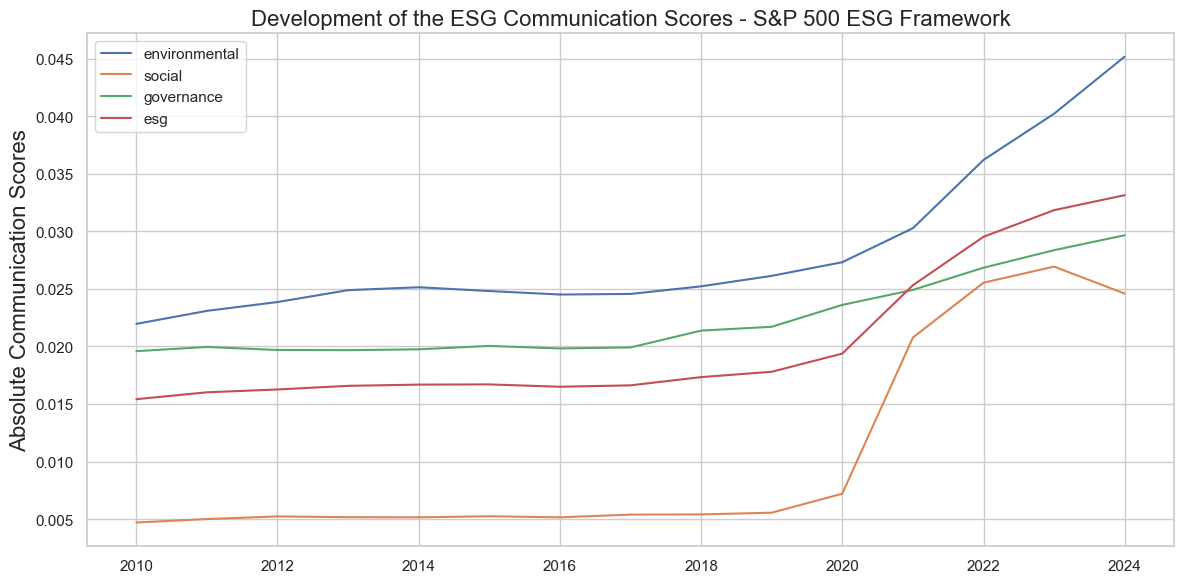

In [10]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Iterate over columns in avg_sp500_esg_scores and plot each column
for column in avg_sp500_esg_scores.columns:
    sns.lineplot(
        x=avg_sp500_esg_scores.index,
        y=avg_sp500_esg_scores[column],
        label=column
    )

# Set the x-axis ticker to show every second year
years = mdates.YearLocator(2)
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.title("Development of the ESG Communication Scores - S&P 500 ESG Framework", fontsize=16)
plt.xlabel("")
plt.ylabel("Absolute Communication Scores", fontsize=16)
plt.tight_layout()
plt.savefig(
    r"YOUR_PATH"
)
plt.show()

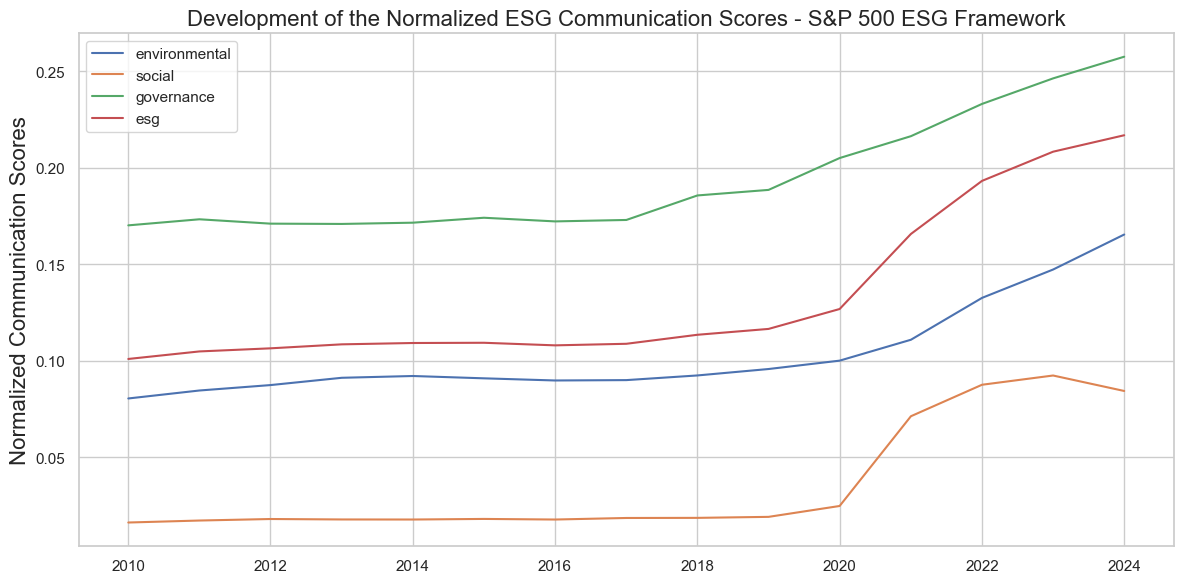

In [11]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Iterate over columns in avg_sp500_esg_scores_normalized and plot each column
for column in avg_sp500_esg_scores_normalized.columns:
    sns.lineplot(
        x=avg_sp500_esg_scores.index,
        y=avg_sp500_esg_scores_normalized[column],
        label=column
    )

# Set the x-axis ticker to show every second year
years = mdates.YearLocator(2)
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.title("Development of the Normalized ESG Communication Scores - S&P 500 ESG Framework", fontsize=16)
plt.xlabel("")
plt.ylabel("Normalized Communication Scores", fontsize=16)
plt.tight_layout()
plt.savefig(
    r"YOUR_PATH"
)
plt.show()

# Plot Difference between the Cumulative Return of the Communication Indices and the S&P 500 ESG

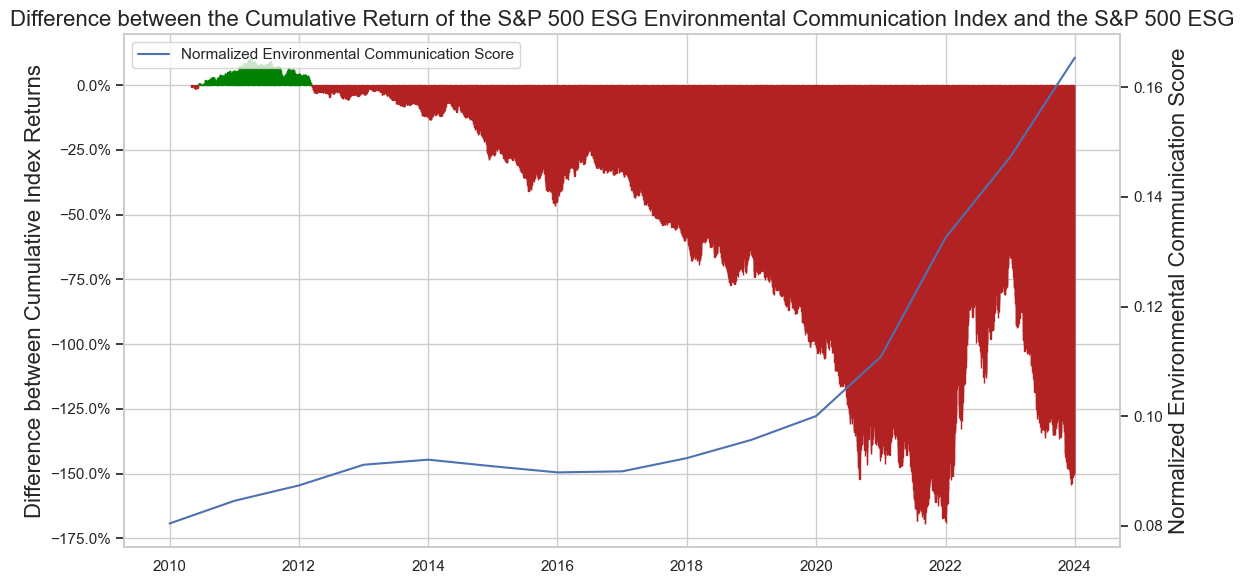

In [12]:
# Set the Seaborn theme and figure size
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create a list of colors based on the values of diff_environmental_mktcap
colors = ["firebrick" if val < 0 else "green" for val in diff_environmental_mktcap.values]

# Create a bar plot for the diff_environmental_mktcap
bars = ax1.bar(diff_environmental_mktcap.index, diff_environmental_mktcap.values, alpha=1, zorder=4)

# Apply the colors to each bar
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Create a bar plot for the diff_environmental_mktcap
ax1.set_ylabel("Difference between Cumulative Index Returns", fontsize=16)
ax1.tick_params(axis="y")

# Set the x-axis ticker to show every second year
years = mdates.YearLocator(2)
ax1.xaxis.set_major_locator(years)

# Set the x-axis formatter to display only the year
formatter = mdates.DateFormatter("%Y")
# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax1.xaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", axis="both", linewidth=1, zorder=0)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Normalized Environmental Communication Score", fontsize=16)
ax2.plot(avg_sp500_esg_scores_normalized.index, avg_sp500_esg_scores_normalized["environmental"], label="Normalized Environmental Communication Score")
ax2.tick_params(axis="y")
ax2.grid(False)
ax2.legend(loc="upper left")

# Title and show plot
plt.title("Difference between the Cumulative Return of the S&P 500 ESG Environmental Communication Index and the S&P 500 ESG", fontsize=16)
fig.tight_layout()
plt.savefig(r"YOUR_PATH")
plt.show()

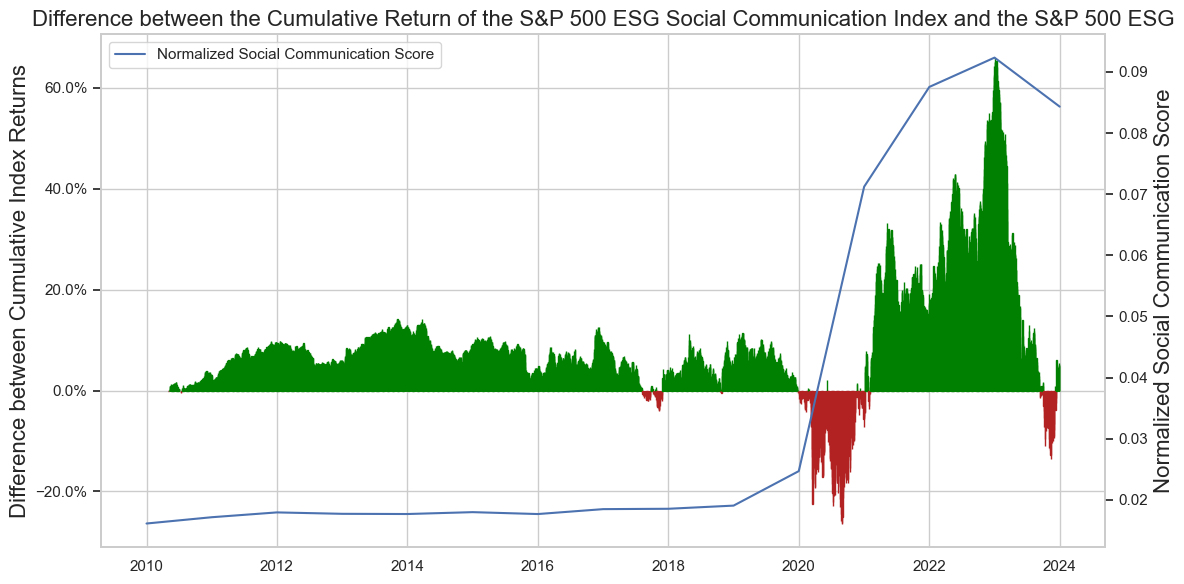

In [13]:
# Set the Seaborn theme and figure size
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create a list of colors based on the values of diff_social_mktcap
colors = ["firebrick" if val < 0 else "green" for val in diff_social_mktcap.values]

# Create a bar plot for the diff_social_mktcap
bars = ax1.bar(diff_social_mktcap.index, diff_social_mktcap.values, alpha=1, zorder=4)

# Apply the colors to each bar
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Create a bar plot for the diff_social_mktcap
ax1.set_ylabel("Difference between Cumulative Index Returns", fontsize=16)
ax1.tick_params(axis="y")

# Set the x-axis ticker to show every second year
years = mdates.YearLocator(2)
ax1.xaxis.set_major_locator(years)

# Set the x-axis formatter to display only the year
formatter = mdates.DateFormatter("%Y")
# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax1.xaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", axis="both", linewidth=1, zorder=0)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Normalized Social Communication Score", fontsize=16)
ax2.plot(avg_sp500_esg_scores_normalized.index, avg_sp500_esg_scores_normalized["social"], label="Normalized Social Communication Score")
ax2.tick_params(axis="y")
ax2.grid(False)
ax2.legend(loc="upper left")

# Title and show plot
plt.title("Difference between the Cumulative Return of the S&P 500 ESG Social Communication Index and the S&P 500 ESG", fontsize=16)
fig.tight_layout()
plt.savefig(r"YOUR_PATH")
plt.show()

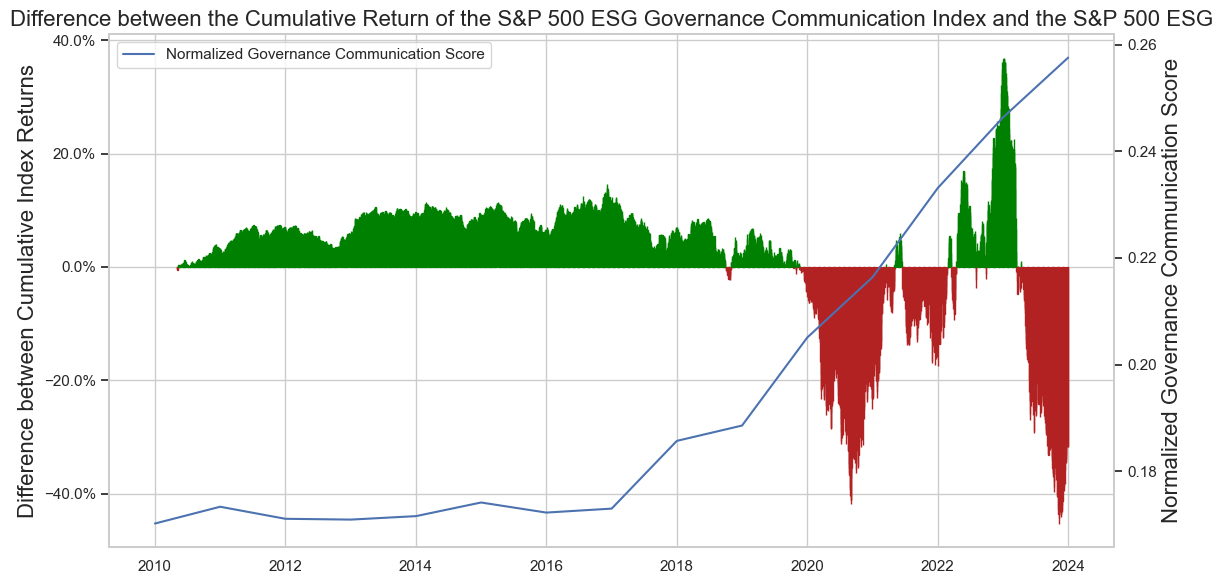

In [14]:
# Set the Seaborn theme and figure size
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create a list of colors based on the values of diff_governance_mktcap
colors = ["firebrick" if val < 0 else "green" for val in diff_governance_mktcap.values]

# Create a bar plot for the diff_governance_mktcap
bars = ax1.bar(diff_governance_mktcap.index, diff_governance_mktcap.values, alpha=1, zorder=4)

# Apply the colors to each bar
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Create a bar plot for the diff_social_mktcap
ax1.set_ylabel("Difference between Cumulative Index Returns", fontsize=16)
ax1.tick_params(axis="y")

# Set the x-axis ticker to show every second year
years = mdates.YearLocator(2)
ax1.xaxis.set_major_locator(years)

# Set the x-axis formatter to display only the year
formatter = mdates.DateFormatter("%Y")
# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax1.xaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", axis="both", linewidth=1, zorder=0)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Normalized Governance Communication Score", fontsize=16)
ax2.plot(avg_sp500_esg_scores_normalized.index, avg_sp500_esg_scores_normalized["governance"], label="Normalized Governance Communication Score")
ax2.tick_params(axis="y")
ax2.grid(False)
ax2.legend(loc="upper left")

# Title and show plot
plt.title("Difference between the Cumulative Return of the S&P 500 ESG Governance Communication Index and the S&P 500 ESG", fontsize=16)
fig.tight_layout()
plt.savefig(r"YOUR_PATH")
plt.show()

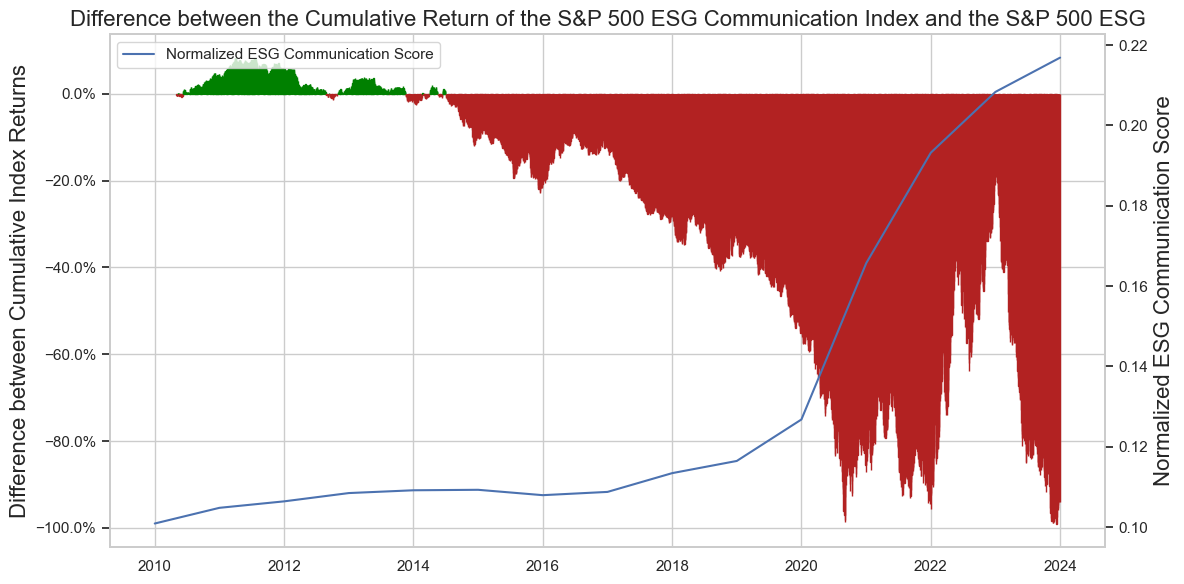

In [15]:
# Set the Seaborn theme and figure size
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create a list of colors based on the values of diff_esg_mktcap
colors = ["firebrick" if val < 0 else "green" for val in diff_esg_mktcap.values]

# Create a bar plot for the diff_esg_mktcap
bars = ax1.bar(diff_esg_mktcap.index, diff_esg_mktcap.values, alpha=1, zorder=4)

# Apply the colors to each bar
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Create a bar plot for the diff_esg_mktcap
ax1.set_ylabel("Difference between Cumulative Index Returns", fontsize=16)
ax1.tick_params(axis="y")

# Set the x-axis ticker to show every second year
years = mdates.YearLocator(2)
ax1.xaxis.set_major_locator(years)

# Set the x-axis formatter to display only the year
formatter = mdates.DateFormatter("%Y")
# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax1.xaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", axis="both", linewidth=1, zorder=0)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Normalized ESG Communication Score", fontsize=16)
ax2.plot(avg_sp500_esg_scores_normalized.index, avg_sp500_esg_scores_normalized["esg"], label="Normalized ESG Communication Score")
ax2.tick_params(axis="y")
ax2.grid(False)
ax2.legend(loc="upper left")

# Title and show plot
plt.title("Difference between the Cumulative Return of the S&P 500 ESG Communication Index and the S&P 500 ESG", fontsize=16)
fig.tight_layout()
plt.savefig(r"YOUR_PATH")
plt.show()

# Plot Correlation Heatmap - S&P 500 ESG

In [16]:
sp_500_esg_annual_returns.year = pd.to_datetime(sp_500_esg_annual_returns.year, format="%Y")

In [17]:
sp500esg_merged_df = pd.merge(avg_sp500_esg_scores_normalized.reset_index(), sp_500_esg_annual_returns, left_on="year", right_on="year").drop(columns="year")
sp500esg_merged_df = sp500esg_merged_df.rename(
    columns={
        "environmental":"Environmental Communication Score",
        "social":"Social Communication Score",
        "governance":"Governance Communication Score",
        "esg":"ESG Communication Score",
        "sp500esg":"S&P 500 ESG Returns",
        "environmental_returns":"Environmental Communication Index Returns",
        "social_returns":"Social Communication Index Returns",
        "governance_returns":"Governance Communication Index Returns",
        "esg_returns":"ESG Communication Index Returns"
        }
    )

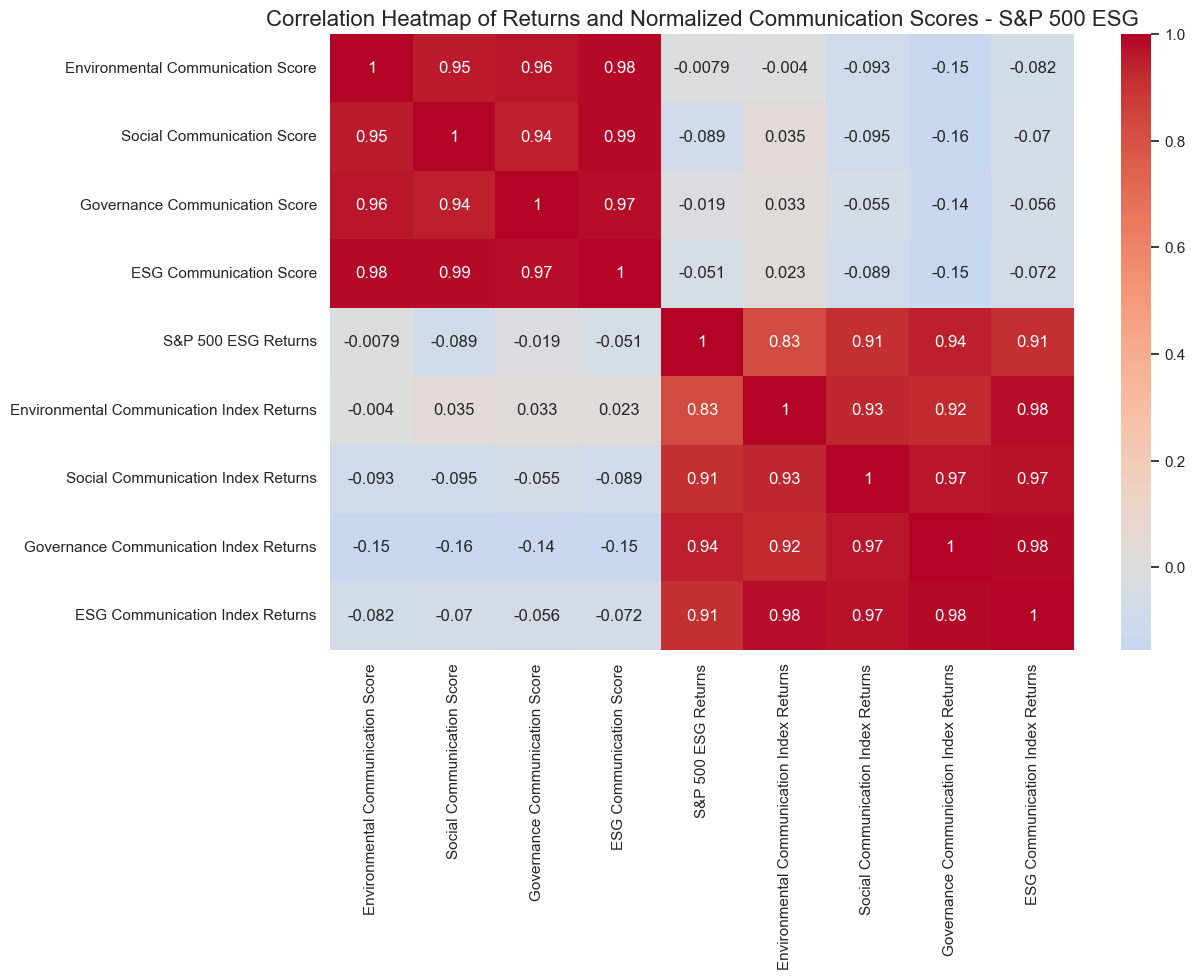

In [18]:
# Calculate the correlation matrix
correlation_matrix = sp500esg_merged_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Returns and Normalized Communication Scores - S&P 500 ESG", fontsize=16)
plt.savefig(r"YOUR_PATH")
plt.show()

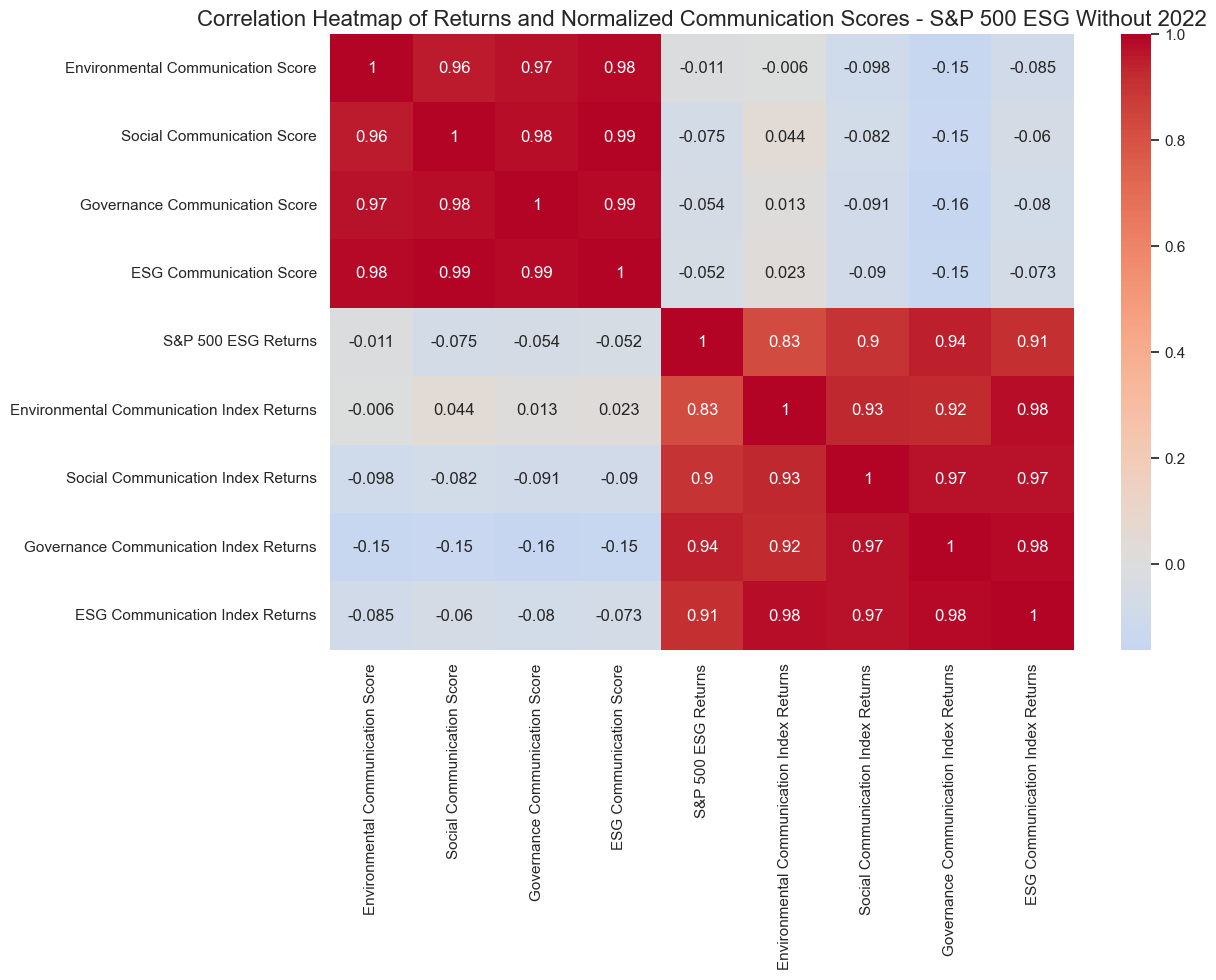

In [19]:
# Calculate the correlation matrix
sp_500_esg_without_2022 = sp500esg_merged_df.drop(sp500esg_merged_df.index[10])

correlation_matrix = sp_500_esg_without_2022.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Returns and Normalized Communication Scores - S&P 500 ESG Without 2022", fontsize=16)
plt.savefig(r"YOUR_PATH")
plt.show()

# Prepare data DAX 50 ESG

In [44]:
dax50_esg_scores = pd.read_csv(r"YOUR_PATH").drop(columns="Unnamed: 0")
dax50_esg_scores_normalized = pd.read_csv(r"YOUR_PATH").drop(columns="Unnamed: 0")
dax_50_esg_cum_return_mktcap = pd.read_csv(r"YOUR_PATH").rename(columns={"Unnamed: 0":"date"}).set_index("date")
dax_50_esg_cum_return_environmental = pd.read_csv(r"YOUR_PATH").rename(columns={"Unnamed: 0":"date"}).set_index("date")
dax_50_esg_cum_return_social = pd.read_csv(r"YOUR_PATH").rename(columns={"Unnamed: 0":"date"}).set_index("date")
dax_50_esg_cum_return_governance = pd.read_csv(r"YOUR_PATH").rename(columns={"Unnamed: 0":"date"}).set_index("date")
dax_50_esg_cum_return_esg = pd.read_csv(r"YOUR_PATH").rename(columns={"Unnamed: 0":"date"}).set_index("date")
dax_50_esg_annual_returns = pd.read_csv(r"YOUR_PATH")

In [29]:
dax_50_diff_environmental_mktcap = dax_50_esg_cum_return_environmental["Cumulative Index Return"] - dax_50_esg_cum_return_mktcap["Cumulative Index Return"]
dax_50_diff_environmental_mktcap.index = pd.to_datetime(dax_50_diff_environmental_mktcap.index)

In [30]:
dax_50_diff_social_mktcap = dax_50_esg_cum_return_social["Cumulative Index Return"] - dax_50_esg_cum_return_mktcap["Cumulative Index Return"]
dax_50_diff_social_mktcap.index = pd.to_datetime(dax_50_diff_social_mktcap.index)

In [31]:
dax_50_diff_governance_mktcap = dax_50_esg_cum_return_governance["Cumulative Index Return"] - dax_50_esg_cum_return_mktcap["Cumulative Index Return"]
dax_50_diff_governance_mktcap.index = pd.to_datetime(dax_50_diff_governance_mktcap.index)

In [32]:
dax_50_diff_esg_mktcap = dax_50_esg_cum_return_esg["Cumulative Index Return"] - dax_50_esg_cum_return_mktcap["Cumulative Index Return"]
dax_50_diff_esg_mktcap.index = pd.to_datetime(dax_50_diff_esg_mktcap.index)

In [33]:
dax50_esg_scores_normalized = dax50_esg_scores_normalized[["year", "environmental_normalized", "social_normalized", "governance_normalized", "esg_normalized"]].set_index("year")
dax50_esg_scores_normalized= dax50_esg_scores_normalized.rename(
    columns={
        "environmental_normalized": "environmental",
        "social_normalized": "social",
        "governance_normalized": "governance",
        "esg_normalized": "esg",
    }
)

In [34]:
# Normalized ESG Communication Scores
avg_dax50_esg_scores_normalized = dax50_esg_scores_normalized.groupby("year").mean()
avg_dax50_esg_scores_normalized.index = pd.to_datetime(avg_dax50_esg_scores_normalized.index, format="%Y")
avg_dax50_esg_scores_normalized = avg_dax50_esg_scores_normalized.iloc[3:]
avg_dax50_esg_scores_normalized

,environmental,social,governance,esg
year,,,,
2012-01-01,0.173227,0.202086,0.273014,0.247951
2013-01-01,0.158960,0.184079,0.280022,0.234646
2014-01-01,0.145689,0.189404,0.263737,0.224302
2015-01-01,0.161452,0.226970,0.287730,0.255029
2016-01-01,0.152953,0.212375,0.312104,0.251415
2017-01-01,0.163212,0.255549,0.407964,0.301825
2018-01-01,0.171340,0.250491,0.415443,0.306742
2019-01-01,0.185750,0.263842,0.437584,0.326712
2020-01-01,0.218191,0.292516,0.476338,0.367939


In [35]:
# ESG Communication Scores
dax50_esg_scores = dax50_esg_scores[["year", "environmental", "social", "governance", "esg"]]
avg_dax50_esg_scores = dax50_esg_scores.groupby("year").mean()
avg_dax50_esg_scores.index = pd.to_datetime(avg_dax50_esg_scores.index, format="%Y")
avg_dax50_esg_scores = avg_dax50_esg_scores.iloc[3:]
avg_dax50_esg_scores

,environmental,social,governance,esg
year,,,,
2012-01-01,0.040542,0.030273,0.030238,0.033684
2013-01-01,0.037348,0.027576,0.031014,0.031979
2014-01-01,0.034377,0.028373,0.029210,0.030653
2015-01-01,0.037906,0.034001,0.031868,0.034591
2016-01-01,0.036003,0.031815,0.034567,0.034128
2017-01-01,0.038300,0.038282,0.045184,0.040589
2018-01-01,0.040119,0.037525,0.046012,0.041219
2019-01-01,0.043345,0.039524,0.048465,0.043778
2020-01-01,0.050608,0.043820,0.052757,0.049062


# Plot abosult ESG Communications Scores DAX 50 ESG

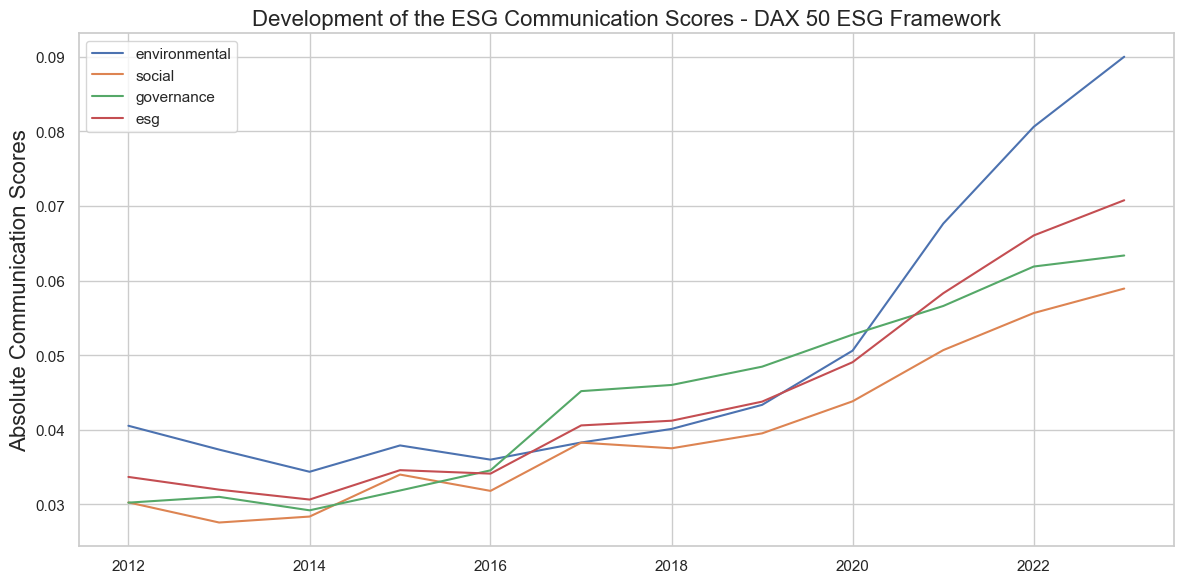

In [36]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Iterate over columns in avg_sp500_esg_scores and plot each column
for column in avg_dax50_esg_scores.columns:
    sns.lineplot(
        x=avg_dax50_esg_scores.index,
        y=avg_dax50_esg_scores[column],
        label=column
    )

# Set the x-axis ticker to show every second year
years = mdates.YearLocator(2)
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.title("Development of the ESG Communication Scores - DAX 50 ESG Framework", fontsize=16)
plt.xlabel("")
plt.ylabel("Absolute Communication Scores", fontsize=16)
plt.tight_layout()
plt.savefig(
    r"YOUR_PATH"
)
plt.show()

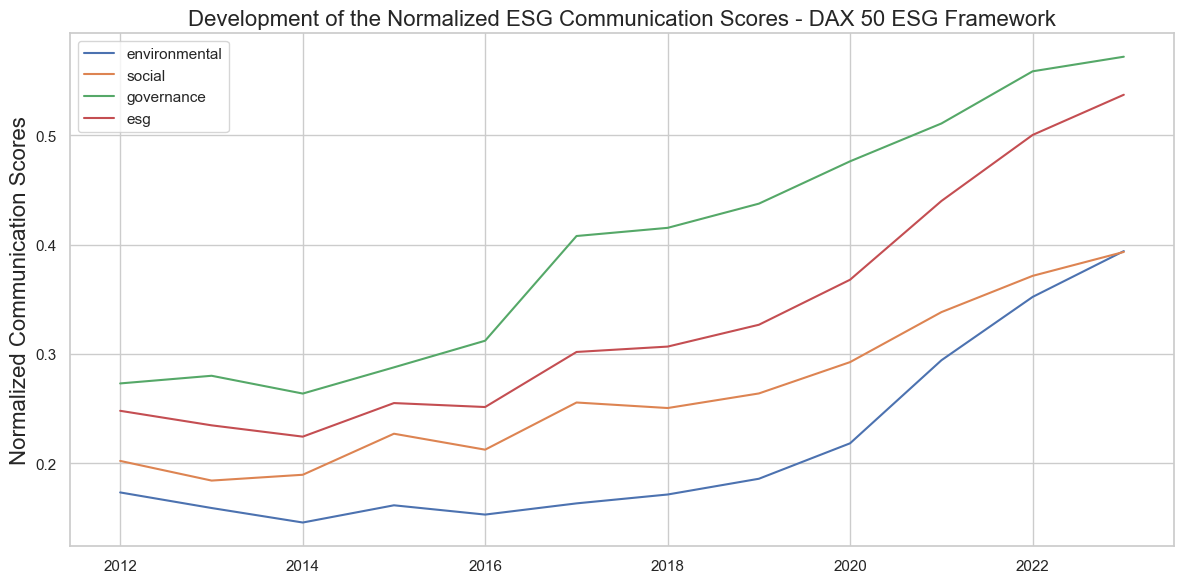

In [37]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Iterate over columns in avg_dax50_esg_scores_normalized and plot each column
for column in avg_dax50_esg_scores_normalized.columns:
    sns.lineplot(
        x=avg_dax50_esg_scores_normalized.index,
        y=avg_dax50_esg_scores_normalized[column],
        label=column
    )

# Set the x-axis ticker to show every second year
years = mdates.YearLocator(2)
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.title("Development of the Normalized ESG Communication Scores - DAX 50 ESG Framework", fontsize=16)
plt.xlabel("")
plt.ylabel("Normalized Communication Scores", fontsize=16)
plt.tight_layout()
plt.savefig(
    r"YOUR_PATH"
)
plt.show()

# Plot Difference between the Cumulative Return of the Communication Indices and the DAX 50 ESG

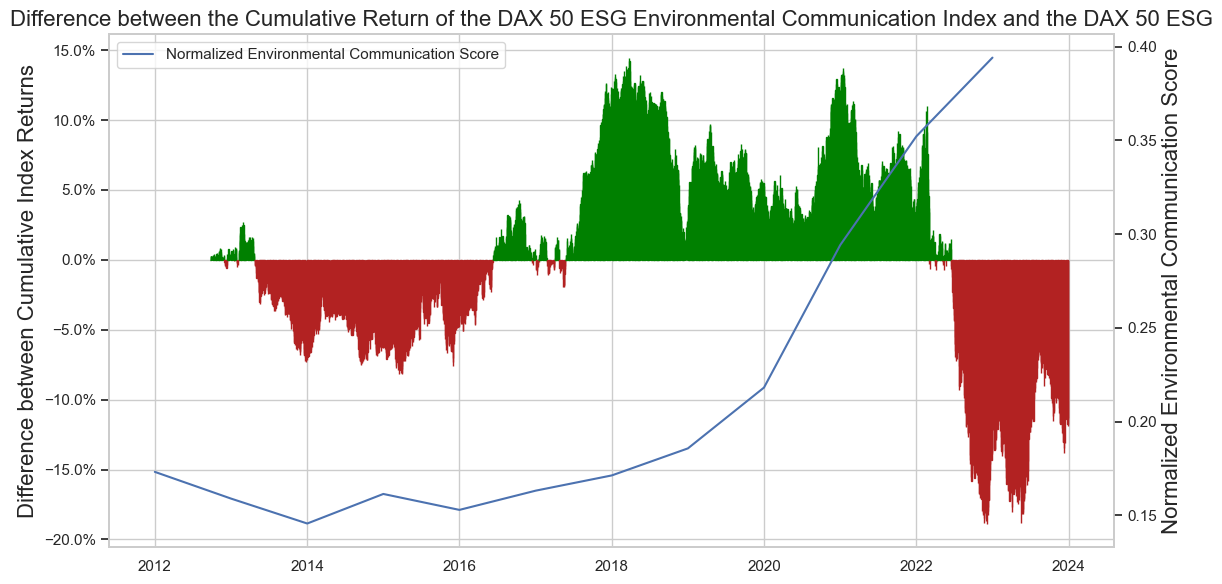

In [38]:
# Set the Seaborn theme and figure size
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create a list of colors based on the values of dax_50_diff_environmental_mktcap
colors = ["firebrick" if val < 0 else "green" for val in dax_50_diff_environmental_mktcap.values]

# Create a bar plot for the dax_50_diff_environmental_mktcap
bars = ax1.bar(dax_50_diff_environmental_mktcap.index, dax_50_diff_environmental_mktcap.values, alpha=1, zorder=4)

# Apply the colors to each bar
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Create a bar plot for the dax_50_diff_environmental_mktcap
ax1.set_ylabel("Difference between Cumulative Index Returns", fontsize=16)
ax1.tick_params(axis="y")

# Set the x-axis ticker to show every second year
years = mdates.YearLocator(2)
ax1.xaxis.set_major_locator(years)

# Set the x-axis formatter to display only the year
formatter = mdates.DateFormatter("%Y")
# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax1.xaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", axis="both", linewidth=1, zorder=0)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Normalized Environmental Communication Score", fontsize=16)
ax2.plot(avg_dax50_esg_scores_normalized.index, avg_dax50_esg_scores_normalized["environmental"], label="Normalized Environmental Communication Score")
ax2.tick_params(axis="y")
ax2.grid(False)
ax2.legend(loc="upper left")

# Title and show plot
plt.title("Difference between the Cumulative Return of the DAX 50 ESG Environmental Communication Index and the DAX 50 ESG", fontsize=16)
fig.tight_layout()
plt.savefig(r"YOUR_PATH")
plt.show()

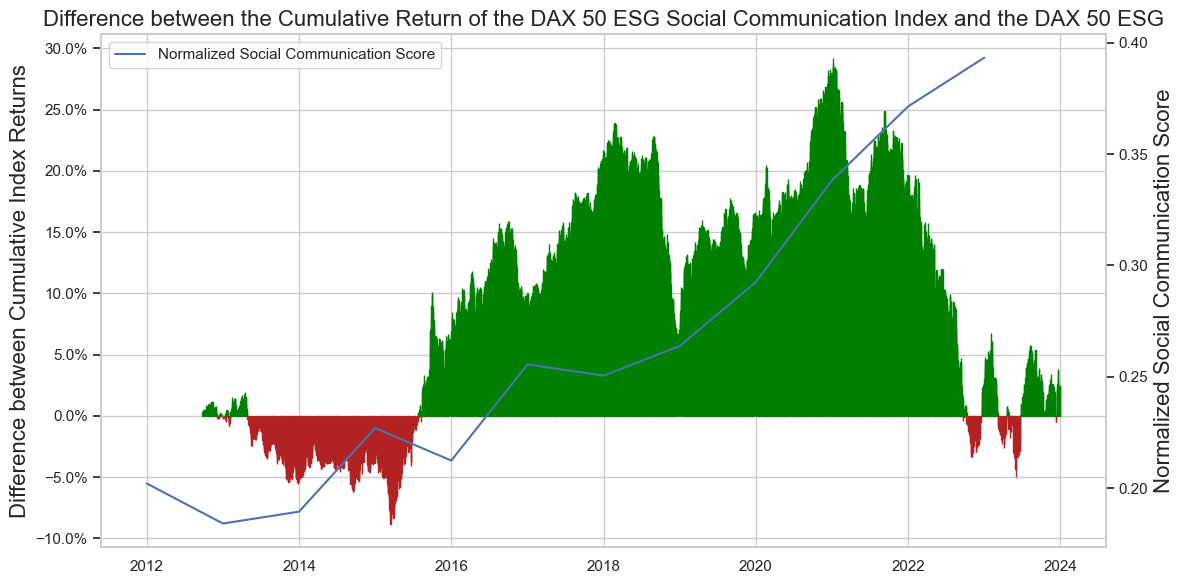

In [39]:
# Set the Seaborn theme and figure size
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create a list of colors based on the values of dax_50_diff_social_mktcap
colors = ["firebrick" if val < 0 else "green" for val in dax_50_diff_social_mktcap.values]

# Create a bar plot for the dax_50_diff_social_mktcap
bars = ax1.bar(dax_50_diff_social_mktcap.index, dax_50_diff_social_mktcap.values, alpha=1, zorder=4)

# Apply the colors to each bar
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Create a bar plot for the dax_50_diff_social_mktcap
ax1.set_ylabel("Difference between Cumulative Index Returns", fontsize=16)
ax1.tick_params(axis="y")

# Set the x-axis ticker to show every second year
years = mdates.YearLocator(2)
ax1.xaxis.set_major_locator(years)

# Set the x-axis formatter to display only the year
formatter = mdates.DateFormatter("%Y")
# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax1.xaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", axis="both", linewidth=1, zorder=0)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Normalized Social Communication Score", fontsize=16)
ax2.plot(avg_dax50_esg_scores_normalized.index, avg_dax50_esg_scores_normalized["social"], label="Normalized Social Communication Score")
ax2.tick_params(axis="y")
ax2.grid(False)
ax2.legend(loc="upper left")

# Title and show plot
plt.title("Difference between the Cumulative Return of the DAX 50 ESG Social Communication Index and the DAX 50 ESG", fontsize=16)
fig.tight_layout()
plt.savefig(r"YOUR_PATH")
plt.show()

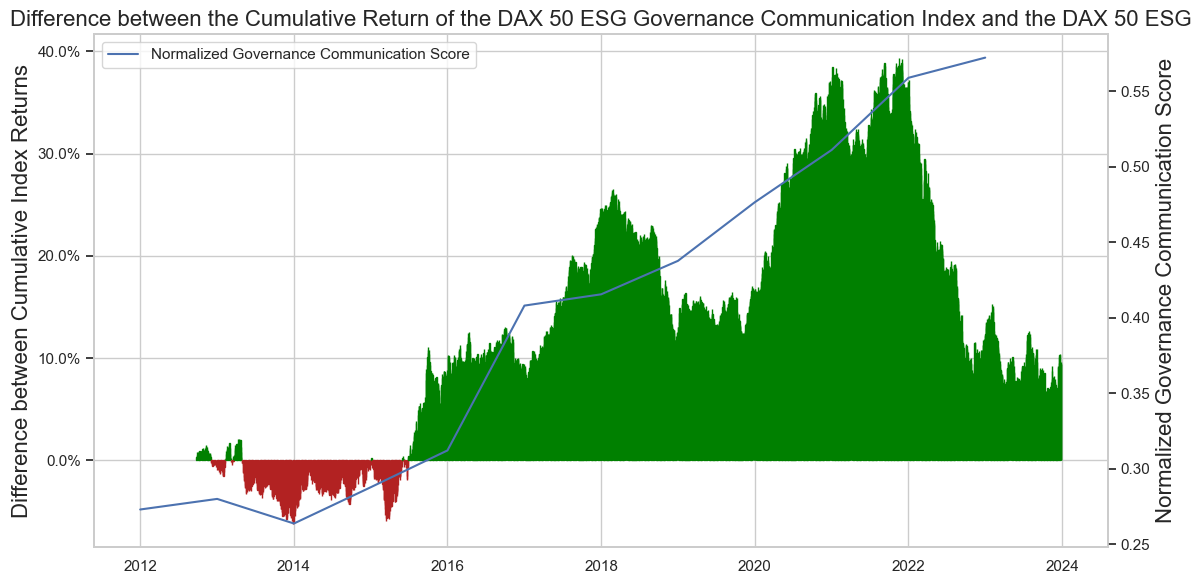

In [40]:
# Set the Seaborn theme and figure size
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create a list of colors based on the values of dax_50_diff_governance_mktcap
colors = ["firebrick" if val < 0 else "green" for val in dax_50_diff_governance_mktcap.values]

# Create a bar plot for the dax_50_diff_governance_mktcap
bars = ax1.bar(dax_50_diff_governance_mktcap.index, dax_50_diff_governance_mktcap.values, alpha=1, zorder=4)

# Apply the colors to each bar
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Create a bar plot for the dax_50_diff_governance_mktcap
ax1.set_ylabel("Difference between Cumulative Index Returns", fontsize=16)
ax1.tick_params(axis="y")

# Set the x-axis ticker to show every second year
years = mdates.YearLocator(2)
ax1.xaxis.set_major_locator(years)

# Set the x-axis formatter to display only the year
formatter = mdates.DateFormatter("%Y")
# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax1.xaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", axis="both", linewidth=1, zorder=0)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Normalized Governance Communication Score", fontsize=16)
ax2.plot(avg_dax50_esg_scores_normalized.index, avg_dax50_esg_scores_normalized["governance"], label="Normalized Governance Communication Score")
ax2.tick_params(axis="y")
ax2.grid(False)
ax2.legend(loc="upper left")

# Title and show plot
plt.title("Difference between the Cumulative Return of the DAX 50 ESG Governance Communication Index and the DAX 50 ESG", fontsize=16)
fig.tight_layout()
plt.savefig(r"YOUR_PATH")
plt.show()

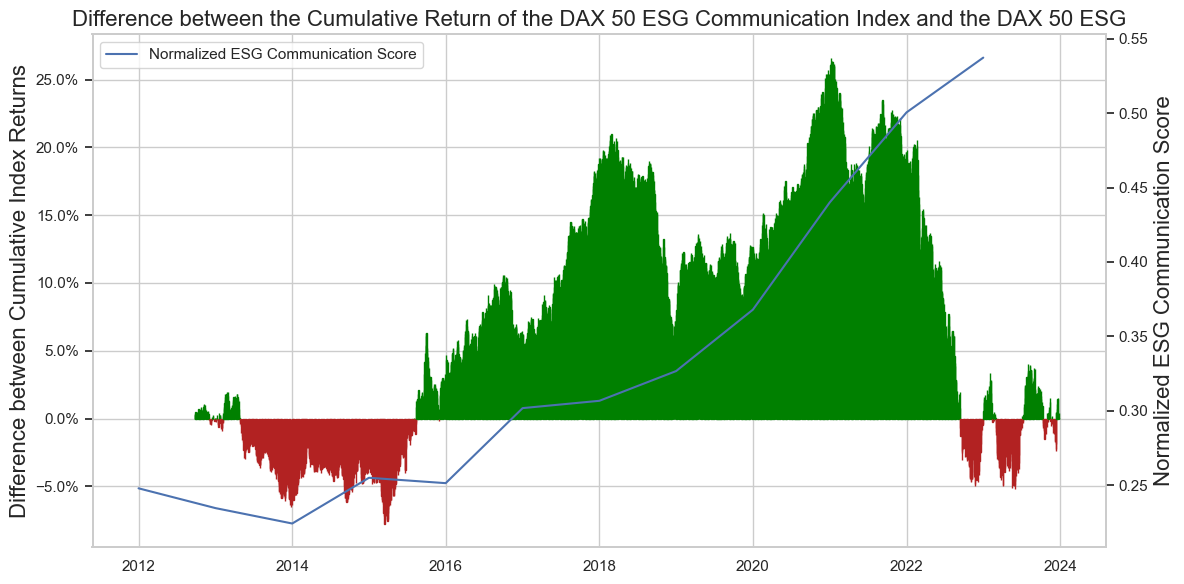

In [41]:
# Set the Seaborn theme and figure size
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create a list of colors based on the values of dax_50_diff_esg_mktcap
colors = ["firebrick" if val < 0 else "green" for val in dax_50_diff_esg_mktcap.values]

# Create a bar plot for the dax_50_diff_esg_mktcap
bars = ax1.bar(dax_50_diff_esg_mktcap.index, dax_50_diff_esg_mktcap.values, alpha=1, zorder=4)

# Apply the colors to each bar
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Create a bar plot for the dax_50_diff_esg_mktcap
ax1.set_ylabel("Difference between Cumulative Index Returns", fontsize=16)
ax1.tick_params(axis="y")

# Set the x-axis ticker to show every second year
years = mdates.YearLocator(2)
ax1.xaxis.set_major_locator(years)

# Set the x-axis formatter to display only the year
formatter = mdates.DateFormatter("%Y")
# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax1.xaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", axis="both", linewidth=1, zorder=0)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Normalized ESG Communication Score", fontsize=16)
ax2.plot(avg_dax50_esg_scores_normalized.index, avg_dax50_esg_scores_normalized["esg"], label="Normalized ESG Communication Score")
ax2.tick_params(axis="y")
ax2.grid(False)
ax2.legend(loc="upper left")

# Title and show plot
plt.title("Difference between the Cumulative Return of the DAX 50 ESG Communication Index and the DAX 50 ESG", fontsize=16)
fig.tight_layout()
plt.savefig(r"YOUR_PATH")
plt.show()

# Plot Correlation Heatmap - DAX 50 ESG

In [45]:
dax_50_esg_annual_returns.year = pd.to_datetime(dax_50_esg_annual_returns.year, format="%Y")

In [46]:
dax50esg_merged_df = pd.merge(avg_dax50_esg_scores_normalized.reset_index(), dax_50_esg_annual_returns, left_on="year", right_on="year").drop(columns="year")
dax50esg_merged_df = dax50esg_merged_df.rename(
    columns={
        "environmental":"Environmental Communication Score",
        "social":"Social Communication Score",
        "governance":"Governance Communication Score",
        "esg":"ESG Communication Score",
        "dax50esg":"DAX 50 ESG Returns",
        "environmental_returns":"Environmental Communication Index Returns",
        "social_returns":"Social Communication Index Returns",
        "governance_returns":"Governance Communication Index Returns",
        "esg_returns":"ESG Communication Index Returns"
        }
    )

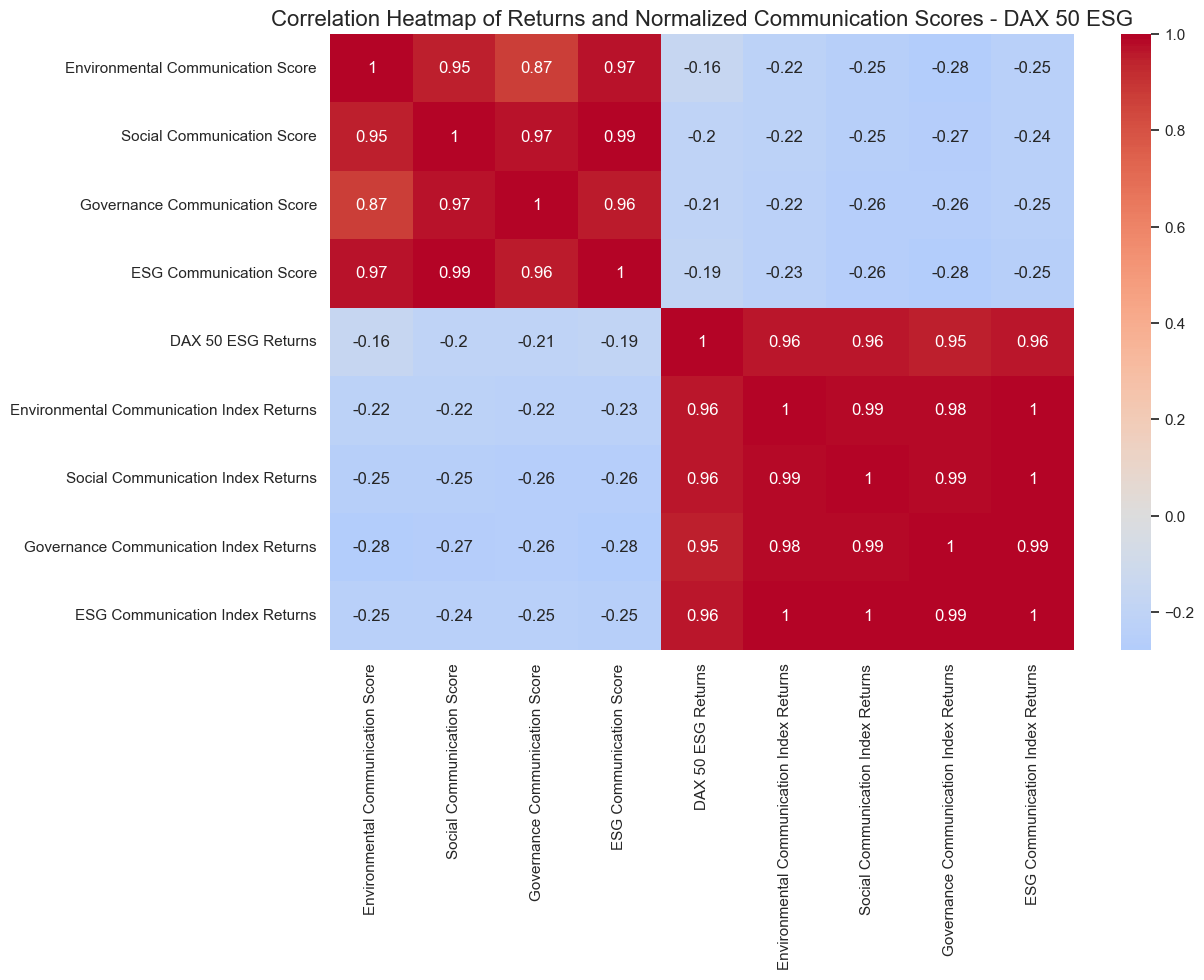

In [47]:
# Calculate the correlation matrix
correlation_matrix = dax50esg_merged_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Returns and Normalized Communication Scores - DAX 50 ESG", fontsize=16)
plt.savefig(r"YOUR_PATH")
plt.show()

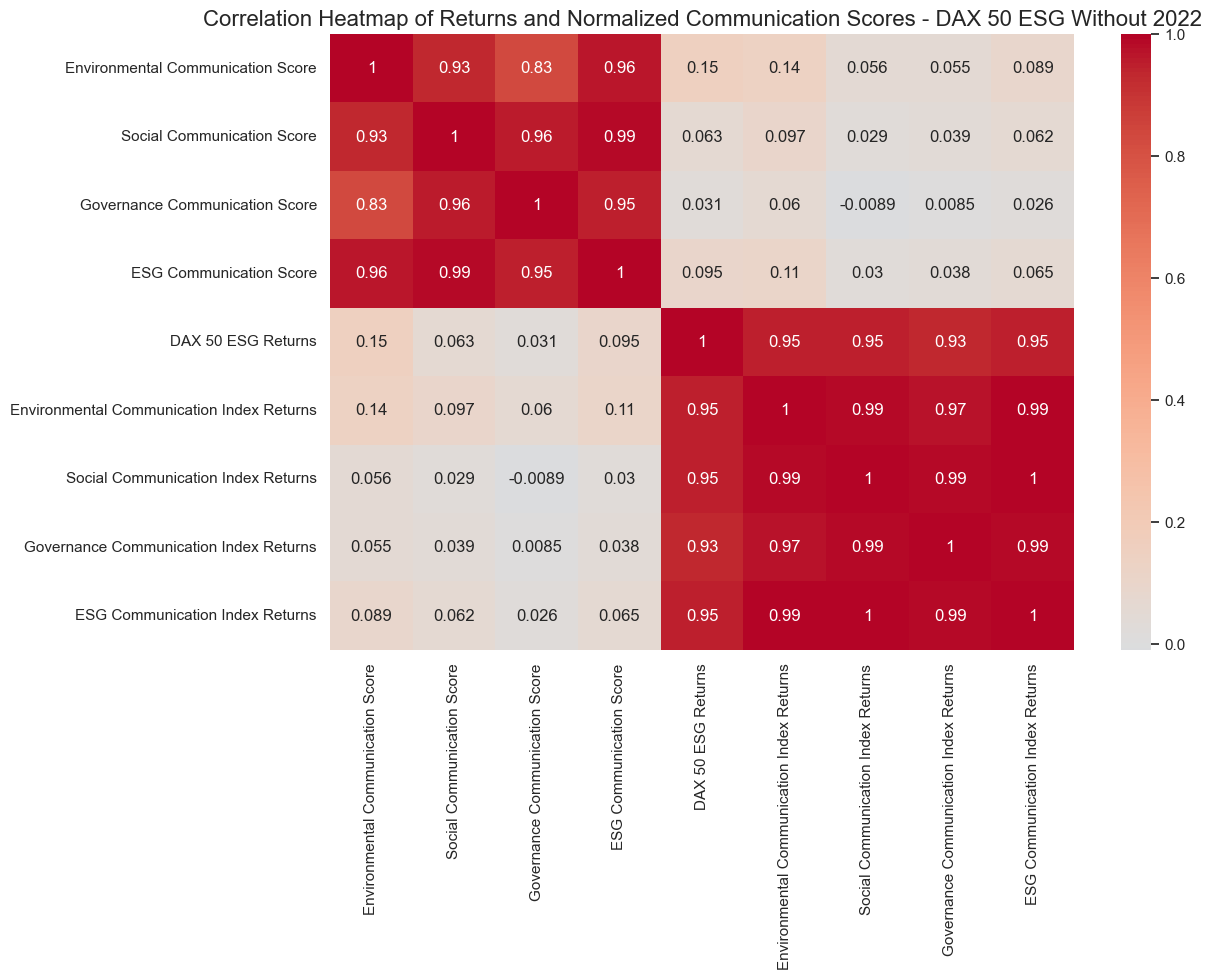

In [48]:
# Calculate the correlation matrix
dax_50_esg_without_2022 = dax50esg_merged_df.drop(dax50esg_merged_df.index[10])

correlation_matrix = dax_50_esg_without_2022.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Returns and Normalized Communication Scores - DAX 50 ESG Without 2022", fontsize=16)
plt.savefig(r"YOUR_PATH")
plt.show()